In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import sklearn
import warnings
import keras
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
from distutils.version import StrictVersion

assert StrictVersion(sklearn.__version__) >= StrictVersion('0.18.1')
assert StrictVersion(tf.__version__) >= StrictVersion('1.0.0')
assert StrictVersion(keras.__version__) >= StrictVersion('1.2.2')

print(sklearn.__version__)
print(tf.__version__)
print(keras.__version__)

0.19.1
1.1.0
2.0.8


## 1. Understading the Challenge and Prepare the Data

### Download data

Data and concept from: https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6#.i728o84ib

https://notebooks.azure.com/faq#service_restrictions 

https://notebooks.azure.com/faq#upload_data

https://notebooks.azure.com/n/xwZx1vmIroU/notebooks/Getting%20to%20your%20Data%20in%20Azure%20Notebooks.ipynb

In [15]:
!curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  1810k      0  0:00:01 --:--:--  0:00:01 2802k


In [19]:
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

In [20]:
!ls -l speed-limit-signs

total 8
drwxr-xr-x  81 shubhankar  staff  2592 Nov 22 18:45 0
drwxr-xr-x  83 shubhankar  staff  2656 Nov 22 18:45 1
drwxr-xr-x  70 shubhankar  staff  2240 Nov 22 18:45 2
drwxr-xr-x  55 shubhankar  staff  1760 Nov 22 18:45 3
drwxr-xr-x  43 shubhankar  staff  1376 Nov 22 18:45 4
drwxr-xr-x  59 shubhankar  staff  1888 Nov 22 18:45 5
-rw-r--r--   1 shubhankar  staff   380 Nov 22 18:45 README.md


In [21]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

In [22]:
!ls speed-limit-signs/0

00000.ppm 00010.ppm 00020.ppm 00030.ppm 00040.ppm 00050.ppm 00060.ppm 00070.ppm
00001.ppm 00011.ppm 00021.ppm 00031.ppm 00041.ppm 00051.ppm 00061.ppm 00071.ppm
00002.ppm 00012.ppm 00022.ppm 00032.ppm 00042.ppm 00052.ppm 00062.ppm 00072.ppm
00003.ppm 00013.ppm 00023.ppm 00033.ppm 00043.ppm 00053.ppm 00063.ppm 00073.ppm
00004.ppm 00014.ppm 00024.ppm 00034.ppm 00044.ppm 00054.ppm 00064.ppm 00074.ppm
00005.ppm 00015.ppm 00025.ppm 00035.ppm 00045.ppm 00055.ppm 00065.ppm 00075.ppm
00006.ppm 00016.ppm 00026.ppm 00036.ppm 00046.ppm 00056.ppm 00066.ppm 00076.ppm
00007.ppm 00017.ppm 00027.ppm 00037.ppm 00047.ppm 00057.ppm 00067.ppm 00077.ppm
00008.ppm 00018.ppm 00028.ppm 00038.ppm 00048.ppm 00058.ppm 00068.ppm 00078.ppm
00009.ppm 00019.ppm 00029.ppm 00039.ppm 00049.ppm 00059.ppm 00069.ppm


### Analyse and Prepare Image Data

In [35]:
import os
import skimage.data

def load_data(data_dir):
    """
    Loads a data set and returns two lists:
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent tha images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in two lists, labels and images
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.ppm')]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [38]:
# Load datasets.
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
images, labels = load_data(data_dir)

In [39]:
len(set(labels)), len(images)

(6, 379)

In [63]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """
    Display the first image of each label.
    """
    unique_labels = set(labels)
    plt.figure(figsize=(10,5))
    label_count = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(1,6,label_count)
        plt.axis('off')
        plt.title('Label {} ({})'.format(label, labels.count(label)))
        label_count += 1
        plt.imshow(image)
    plt.show()

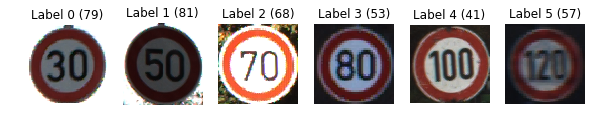

In [64]:
display_images_and_labels(images, labels)

In [67]:
for image in images[:5]:
    print("shape: {}, min: {}, max: {}".format(image.shape, image.min(), image.max()))

shape: (64, 65, 3), min: 0, max: 255
shape: (46, 46, 3), min: 42, max: 255
shape: (30, 29, 3), min: 24, max: 255
shape: (27, 27, 3), min: 50, max: 255
shape: (47, 47, 3), min: 14, max: 227


In [75]:
import skimage.transform

# Resizze images
images64 = [skimage.transform.resize(image, (64,64)) for image in images]

In [73]:
for image in images64[:5]:
    print("shape: {}, min: {}, max: {}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.01381740196078481, max: 1.0
shape: (64, 64, 3), min: 0.16470588235294117, max: 1.0
shape: (64, 64, 3), min: 0.09411764705882353, max: 1.0
shape: (64, 64, 3), min: 0.19607843137254902, max: 1.0
shape: (64, 64, 3), min: 0.07121414483762364, max: 0.8678947897518385


In [74]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))

## 2. Choosing the right architecture

### Training a simple Keras model

In [78]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

In [79]:
y

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])